<a href="https://colab.research.google.com/github/pranadhitya/MOBILE-DEVELOPMENT/blob/main/Flowers_Classification.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
from google.colab import drive
drive.mount('/content/gdrive')

Mounted at /content/gdrive


## Import Library

In [2]:
import numpy as np
import keras
from keras.models import Sequential
from keras.layers import Dense,Conv2D,MaxPool2D,Dropout,BatchNormalization,Flatten,Activation
from keras.preprocessing import image 
from keras.preprocessing.image import ImageDataGenerator
import matplotlib.pyplot as plt
from keras.utils.vis_utils import plot_model
import seaborn as sns
from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix
import tensorflow as tf

## Download Dataset

In [3]:
# Ganti filepath berikut ini sesuai masing-masing.
filepath = "gdrive/MyDrive/DATASET/DATASET.zip"

! cp {filepath} ./

In [4]:
! unzip /content/DATASET.zip

Archive:  /content/DATASET.zip
   creating: DATASET/
   creating: DATASET/DATASET/
   creating: DATASET/DATASET/TEST/
   creating: DATASET/DATASET/TEST/Batik Bali/
  inflating: DATASET/DATASET/TEST/Batik Bali/70.jpg  
  inflating: DATASET/DATASET/TEST/Batik Bali/71.jpg  
  inflating: DATASET/DATASET/TEST/Batik Bali/72.jpg  
  inflating: DATASET/DATASET/TEST/Batik Bali/73.jpg  
  inflating: DATASET/DATASET/TEST/Batik Bali/74.jpg  
  inflating: DATASET/DATASET/TEST/Batik Bali/75.jpg  
  inflating: DATASET/DATASET/TEST/Batik Bali/76.jpg  
  inflating: DATASET/DATASET/TEST/Batik Bali/77.jpg  
  inflating: DATASET/DATASET/TEST/Batik Bali/78.jpg  
  inflating: DATASET/DATASET/TEST/Batik Bali/79.jpg  
  inflating: DATASET/DATASET/TEST/Batik Bali/80.jpg  
  inflating: DATASET/DATASET/TEST/Batik Bali/81.jpg  
  inflating: DATASET/DATASET/TEST/Batik Bali/82.jpg  
  inflating: DATASET/DATASET/TEST/Batik Bali/83.jpg  
  inflating: DATASET/DATASET/TEST/Batik Bali/84.jpg  
  inflating: DATASET/DATAS

In [5]:
#menghapus data yg tdk diperlukan
! rm /content/DATASET.zip

## Mengumpulkan Variabel

In [6]:
import os
dataset ="/content/DATASET"
file_name = []
tag = []
full_path = []
for path, subdirs, files in os.walk(dataset):
    for name in files:
        full_path.append(os.path.join(path, name)) 
        tag.append(path.split('/')[-1])        
        file_name.append(name)

In [7]:
import pandas as pd

In [8]:
df = pd.DataFrame({"path":full_path,'file_name':file_name,"tag":tag})
df.groupby(['path','file_name','tag']).size()

path                                                file_name  tag         
/content/DATASET/DATASET/TEST/Batik Bali/70.jpg     70.jpg     Batik Bali      1
/content/DATASET/DATASET/TEST/Batik Bali/71.jpg     71.jpg     Batik Bali      1
/content/DATASET/DATASET/TEST/Batik Bali/72.jpg     72.jpg     Batik Bali      1
/content/DATASET/DATASET/TEST/Batik Bali/73.jpg     73.jpg     Batik Bali      1
/content/DATASET/DATASET/TEST/Batik Bali/74.jpg     74.jpg     Batik Bali      1
                                                                              ..
/content/DATASET/DATASET/TRAIN/Batik Tambal/68.jpg  68.jpg     Batik Tambal    1
/content/DATASET/DATASET/TRAIN/Batik Tambal/69.jpg  69.jpg     Batik Tambal    1
/content/DATASET/DATASET/TRAIN/Batik Tambal/7.jpg   7.jpg      Batik Tambal    1
/content/DATASET/DATASET/TRAIN/Batik Tambal/8.jpg   8.jpg      Batik Tambal    1
/content/DATASET/DATASET/TRAIN/Batik Tambal/9.jpg   9.jpg      Batik Tambal    1
Length: 1350, dtype: int64

## Melakukan split data

In [9]:
from sklearn.model_selection import train_test_split

In [10]:
X= df['path']
y= df['tag']

In [11]:
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.20, random_state=300)

In [12]:
X_test, X_val, y_test, y_val = train_test_split(
    X_test, y_test, test_size=0.5, random_state=100)

In [13]:
df_train = pd.DataFrame({'path':X_train,'tag':y_train,'set':'train'})

df_validate = pd.DataFrame({'path':X_val,'tag':y_val,'set':'validation'})

df_test = pd.DataFrame({'path':X_test,'tag':y_test,'set':'test'})

In [14]:
print('jumlah data train: ', len(df_train))
print('jumlah data validasi: ', len(df_validate))
print('jumlah data tes: ', len(df_test))

jumlah data train:  1080
jumlah data validasi:  135
jumlah data tes:  135


In [15]:
df_all = df_train.append([df_test,df_validate]).reset_index(drop=1)\

print(df_all.groupby(['set','tag']).size(),'\n')

df_all.sample(3)

set         tag                 
test        Batik Bali              12
            Batik Betawi            11
            Batik Cendrawasih        5
            Batik Dayak             10
            Batik Geblek Renteng     4
            Batik Ikat Celup        10
            Batik Insang             6
            Batik Kawung            10
            Batik Lasem              8
            Batik Megamendung       13
            Batik Pala               6
            Batik Parang            10
            Batik Poleng             8
            Batik Sekar Jagad        7
            Batik Tambal            15
train       Batik Bali              74
            Batik Betawi            68
            Batik Cendrawasih       75
            Batik Dayak             73
            Batik Geblek Renteng    76
            Batik Ikat Celup        73
            Batik Insang            73
            Batik Kawung            74
            Batik Lasem             75
            Batik Megamendung  

,path,tag,set
655,/content/DATASET/DATASET/TRAIN/Batik Cendrawas...,Batik Cendrawasih,train
1273,/content/DATASET/DATASET/TRAIN/Batik Ikat Celu...,Batik Ikat Celup,validation
21,/content/DATASET/DATASET/TRAIN/Batik Lasem/6.jpg,Batik Lasem,train


## Menyimpan data train,val,test ke folder baru

In [16]:
import shutil
from tqdm.notebook import tqdm as tq

In [17]:

for index, row in tq(df_all.iterrows()):
    
    file_path = row['path']
    if os.path.exists(file_path) == False:
            file_path = os.path.join("/content",row['tag'],row['image'].split('.')[0])            
    
    if os.path.exists(os.path.join("/content",row['set'],row['tag'])) == False:
        os.makedirs(os.path.join("/content",row['set'],row['tag']))
    
    destination_file_name = file_path.split('/')[-1]
    file_dest = os.path.join("/content",row['set'],row['tag'],destination_file_name)
    
    if os.path.exists(file_dest) == False:
        shutil.copy2(file_path,file_dest)

0it [00:00, ?it/s]

##Save Model TFLite

In [21]:
img_height, img_width = 32, 32
batch_size = 20

train_ds = tf.keras.utils.image_dataset_from_directory(
    "/content/DATASET/TRAIN",
    image_size = (img_height, img_width),
    batch_size = batch_size
)
val_ds = tf.keras.utils.image_dataset_from_directory(
    "/content/validation",
    image_size = (img_height, img_width),
    batch_size = batch_size
)
test_ds = tf.keras.utils.image_dataset_from_directory(
    "/content/DATASET/TEST",
    image_size = (img_height, img_width),
    batch_size = batch_size
)

Found 1050 files belonging to 15 classes.
Found 135 files belonging to 15 classes.
Found 300 files belonging to 15 classes.


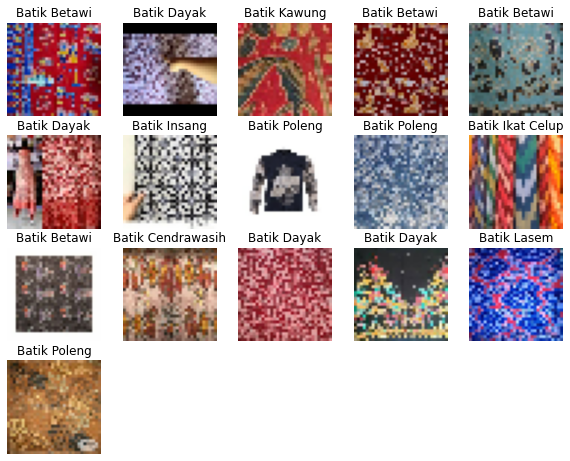

In [22]:
class_names = ["Batik Bali", "Batik Betawi", "Batik Cendrawasih", "Batik Dayak", "Batik Dayak", "Batik Geblek Renteng", "Batik Ikat Celup", "Batik Insang", "Batik Kawung", "Batik Lasem", "Batik Megamendung", "Batik Pala", "Batik Parang", "Batik Poleng", "Batik Sekar Jagad", "Batik Tambal"]
plt.figure(figsize=(10,10))
for images, labels in train_ds.take(1):
  for i in range(16):
    ax = plt.subplot(5, 5, i + 1)
    plt.imshow(images[i].numpy().astype("uint8"))
    plt.title(class_names[labels[i]])
    plt.axis("off")

In [23]:
model = tf.keras.Sequential(
    [
     tf.keras.layers.Rescaling(1./255),
     tf.keras.layers.Conv2D(32, 3, activation="relu"),
     tf.keras.layers.MaxPooling2D(),
     tf.keras.layers.Conv2D(32, 3, activation="relu"),
     tf.keras.layers.MaxPooling2D(),
     tf.keras.layers.Conv2D(32, 3, activation="relu"),
     tf.keras.layers.MaxPooling2D(),
     tf.keras.layers.Flatten(),
     tf.keras.layers.Dense(128, activation="relu"),
     tf.keras.layers.Dense(3)
    ]
)

In [24]:
model.compile(
    optimizer="adam",
    loss=tf.losses.SparseCategoricalCrossentropy(from_logits = True),
    metrics=['accuracy']
)

In [25]:
model.fit(
    train_ds,
    validation_data = val_ds,
    epochs = 10
)

Epoch 1/10
53/53 [==============================] - 13s 20ms/step - loss: nan - accuracy: 0.0676 - val_loss: nan - val_accuracy: 0.0296
Epoch 2/10
53/53 [==============================] - 1s 14ms/step - loss: nan - accuracy: 0.0667 - val_loss: nan - val_accuracy: 0.0296
Epoch 3/10
53/53 [==============================] - 1s 15ms/step - loss: nan - accuracy: 0.0667 - val_loss: nan - val_accuracy: 0.0296
Epoch 4/10
53/53 [==============================] - 1s 14ms/step - loss: nan - accuracy: 0.0667 - val_loss: nan - val_accuracy: 0.0296
Epoch 5/10
53/53 [==============================] - 1s 14ms/step - loss: nan - accuracy: 0.0667 - val_loss: nan - val_accuracy: 0.0296
Epoch 6/10
53/53 [==============================] - 1s 14ms/step - loss: nan - accuracy: 0.0667 - val_loss: nan - val_accuracy: 0.0296
Epoch 7/10
53/53 [==============================] - 1s 14ms/step - loss: nan - accuracy: 0.0667 - val_loss: nan - val_accuracy: 0.0296
Epoch 8/10
53/53 [==============================] - 1s

In [26]:
model.evaluate(test_ds)

15/15 [==============================] - 0s 7ms/step - loss: nan - accuracy: 0.0667


[nan, 0.06666667014360428]

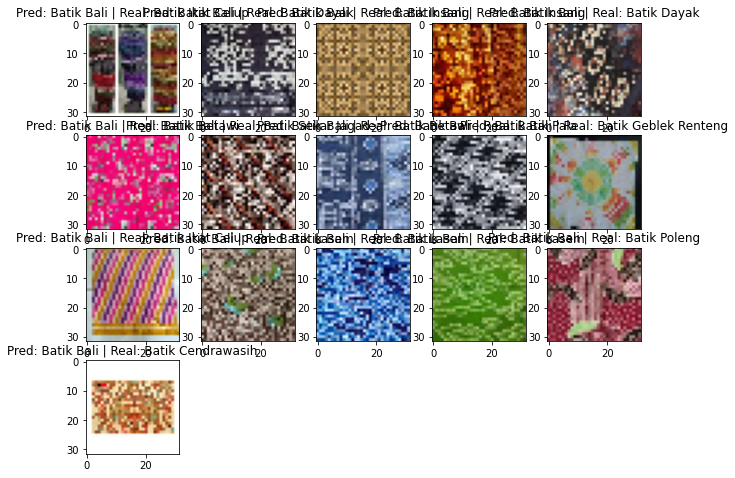

In [27]:
import numpy

plt.figure(figsize=(10,10))
for images, labels in test_ds.take(1):
  classifications = model(images)
  # print(classifications)
  
  for i in range(16):
    ax = plt.subplot(5, 5, i + 1)
    plt.imshow(images[i].numpy().astype("uint8"))
    index = numpy.argmax(classifications[i])
    plt.title("Pred: " + class_names[index] + " | Real: " + class_names[labels[i]])

In [28]:
converter = tf.lite.TFLiteConverter.from_keras_model(model)
tflite_model = converter.convert()

with open("model.tflite", 'wb') as f:
  f.write(tflite_model)

INFO:tensorflow:Assets written to: /tmp/tmp2l9g5oag/assets


## Mengubah gambar menjadi data array

In [29]:
from keras.preprocessing.image import ImageDataGenerator

In [30]:
train_generator = ImageDataGenerator(rescale=1/255, vertical_flip = True, horizontal_flip=True)

val_generator = ImageDataGenerator(rescale=1/255, vertical_flip = True, horizontal_flip=True)

test_generator = ImageDataGenerator(rescale=1/255, vertical_flip = True, horizontal_flip=True)

In [31]:
train_image = train_generator.flow_from_directory('/content/train',
                                                    target_size=(224, 224),
                                                    batch_size=512,
                                                    class_mode='sparse',
                                                    shuffle=True)

val_image = val_generator.flow_from_directory('/content/validation',
                                                target_size=(224, 224),
                                                batch_size=512,
                                                class_mode='sparse',
                                                shuffle=True)

test_image = test_generator.flow_from_directory('/content/test',
                                                  target_size=(224, 224),
                                                  batch_size=512,
                                                  class_mode='sparse',
                                                  shuffle=True)

Found 1080 images belonging to 15 classes.
Found 135 images belonging to 15 classes.
Found 135 images belonging to 15 classes.


In [32]:
#the dictionary 
num_classes=(len(train_image.class_indices))
print(num_classes)
train_image.class_indices

15


{'Batik Bali': 0,
 'Batik Betawi': 1,
 'Batik Cendrawasih': 2,
 'Batik Dayak': 3,
 'Batik Geblek Renteng': 4,
 'Batik Ikat Celup': 5,
 'Batik Insang': 6,
 'Batik Kawung': 7,
 'Batik Lasem': 8,
 'Batik Megamendung': 9,
 'Batik Pala': 10,
 'Batik Parang': 11,
 'Batik Poleng': 12,
 'Batik Sekar Jagad': 13,
 'Batik Tambal': 14}

In [33]:
# load pickle module
import pickle

# create a binary pickle file 
f = open("num_class_batik.pkl","wb")

# write the python object (dict) to pickle file
pickle.dump(train_image.class_indices,f)

# close file
f.close()

pickle_inn = open('num_class_batik.pkl','rb')
classes_plant = pickle.load(pickle_inn)

# Training

## Downloading Pretrained Model

In [34]:
import keras
convlayer = keras.applications.resnet_v2.ResNet50V2(input_shape=(224,224,3),weights='imagenet', include_top=False, pooling='avg')
for layer in convlayer.layers:
    layer.trainable=False

94683136/94668760 [==============================] - 1s 0us/step


## Adding the layer to the Dense Layers

In [35]:
#Adding the layer to the Dense Layers
model=Sequential()
model.add(convlayer)
model.add(Dropout(0.5))
model.add(Flatten())
model.add(BatchNormalization())
model.add(Dense(2048,kernel_initializer='he_uniform'))
model.add(BatchNormalization())
model.add(Activation('relu'))
model.add(Dropout(0.5))
model.add(Dense(1024,kernel_initializer='he_uniform'))
model.add(BatchNormalization())
model.add(Activation('relu'))
model.add(Dropout(0.5))
model.add(Dense(num_classes,activation='softmax',kernel_initializer='glorot_uniform'))
print(model.summary())

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 resnet50v2 (Functional)     (None, 2048)              23564800  
                                                                 
 dropout (Dropout)           (None, 2048)              0         
                                                                 
 flatten_1 (Flatten)         (None, 2048)              0         
                                                                 
 batch_normalization (BatchN  (None, 2048)             8192      
 ormalization)                                                   
                                                                 
 dense_2 (Dense)             (None, 2048)              4196352   
                                                                 
 batch_normalization_1 (Batc  (None, 2048)             8192      
 hNormalization)                                      

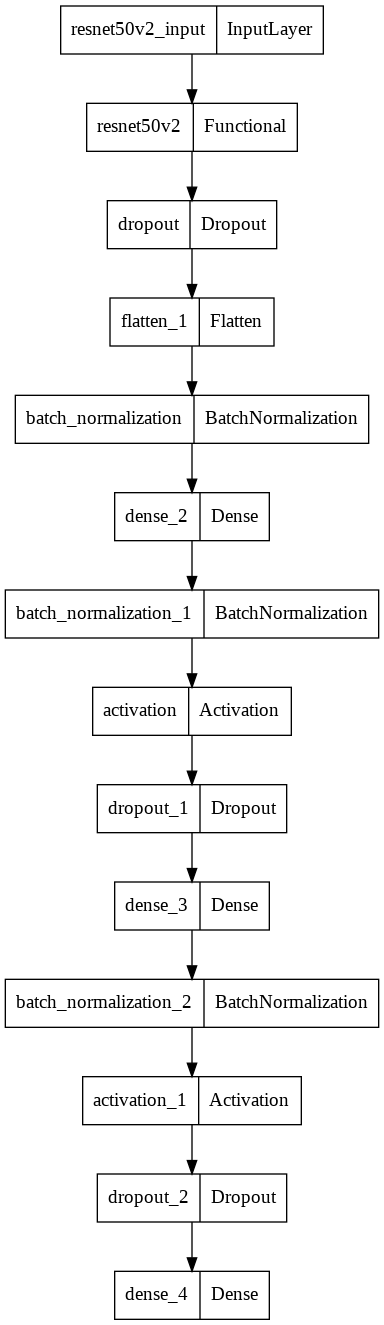

In [36]:
plot_model(model)

## Fine-Tuning the Model

In [37]:
#Use a small learning rate for better accuracy
from tensorflow import keras
from keras import optimizers
optimizer=keras.optimizers.RMSprop(lr=0.001)
model.compile(optimizer=optimizer,loss='sparse_categorical_crossentropy',metrics=['accuracy'])
history=model.fit(train_image,epochs=20,validation_data=val_image)

/usr/local/lib/python3.7/dist-packages/keras/optimizer_v2/rmsprop.py:130: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super(RMSprop, self).__init__(name, **kwargs)


Epoch 1/20
3/3 [==============================] - 22s 8s/step - loss: 2.9027 - accuracy: 0.1907 - val_loss: 2.2876 - val_accuracy: 0.3185
Epoch 2/20
3/3 [==============================] - 5s 1s/step - loss: 2.0834 - accuracy: 0.3611 - val_loss: 1.8539 - val_accuracy: 0.4667
Epoch 3/20
3/3 [==============================] - 4s 1s/step - loss: 1.6307 - accuracy: 0.4889 - val_loss: 1.5177 - val_accuracy: 0.4889
Epoch 4/20
3/3 [==============================] - 4s 1s/step - loss: 1.4397 - accuracy: 0.5500 - val_loss: 1.3386 - val_accuracy: 0.5630
Epoch 5/20
3/3 [==============================] - 4s 1s/step - loss: 1.2637 - accuracy: 0.6065 - val_loss: 1.1524 - val_accuracy: 0.6222
Epoch 6/20
3/3 [==============================] - 4s 2s/step - loss: 1.1786 - accuracy: 0.6204 - val_loss: 1.0292 - val_accuracy: 0.6296
Epoch 7/20
3/3 [==============================] - 4s 2s/step - loss: 1.0649 - accuracy: 0.6454 - val_loss: 1.0038 - val_accuracy: 0.6889
Epoch 8/20
3/3 [========================

## Testing the Model

In [38]:
model.evaluate(test_image)

1/1 [==============================] - 1s 662ms/step - loss: 0.9092 - accuracy: 0.7259


[0.9092429876327515, 0.7259259223937988]

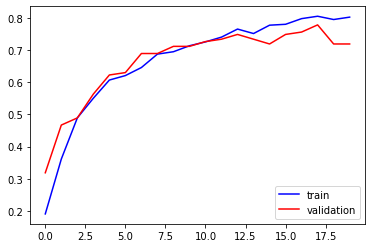

In [39]:
plt.plot(history.history['accuracy'],c='b',label='train')
plt.plot(history.history['val_accuracy'],c='r',label='validation')
plt.legend(loc='lower right')
plt.show()

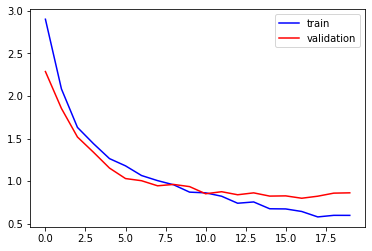

In [40]:
plt.plot(history.history['loss'],c='b',label='train')
plt.plot(history.history['val_loss'],c='r',label='validation')
plt.legend(loc='upper right')
plt.show()



In [41]:


training_accuracy_resnet      = history.history['accuracy'][-1]
training_loss_resnet          = history.history['loss'][-1]
validation_accuracy_resnet    = history.history['val_accuracy'][-1]
validation_loss_resnet        = history.history['val_loss'][-1]
print("Training Accuracy ResNet   :", training_accuracy_resnet )
print("Training Loss ResNet       :", training_loss_resnet)
print("Validation Accuracy ResNet :", validation_accuracy_resnet)
print("Validation Loss ResNet     :", validation_loss_resnet)



Training Accuracy ResNet   : 0.8018518686294556
Training Loss ResNet       : 0.5962452292442322
Validation Accuracy ResNet : 0.7185184955596924
Validation Loss ResNet     : 0.861350417137146


##Save Model

In [42]:
#save model h5
SAVE_MODEL_NAME = "model.h5"
save_model_path = os.path.join(SAVE_MODEL_NAME)
    
print('Saving Model At {}...'.format(save_model_path))
model.save(save_model_path,include_optimizer=False)


Saving Model At model.h5...


## Inferencing Using the Model

In [43]:
from tensorflow.keras.models import load_model
MODEL_PATH = '/content/model.h5'
model2 = load_model(MODEL_PATH,compile=False)

In [44]:
pickle_inn = open('/content/num_class_batik.pkl','rb')
classes_flowers = pickle.load(pickle_inn)

In [45]:
def predict2(dir):
    img=image.load_img(dir,target_size=(224,224))
    img1=image.img_to_array(img)
    img1=img1/255
    img1=np.expand_dims(img1,[0]) 
    plt.imshow(img)
    predict=model2.predict(img1)
    classes=np.argmax(predict,axis=1)
    for key,values in classes_plant.items():
        if classes==values:
          print(classes)
          print("INI ADALAH BATIK: "+str(key)+" with a probability of "+str(round(np.max(model2.predict(img1))*100,2))+"%")

[3]
INI ADALAH BATIK: Batik Dayak with a probability of 91.9%


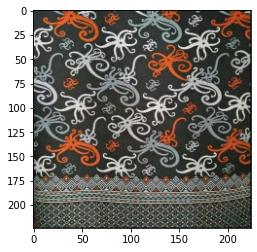

In [46]:
predict2('/content/train/Batik Dayak/1.jpg')

[7]
INI ADALAH BATIK: Batik Kawung with a probability of 91.29%


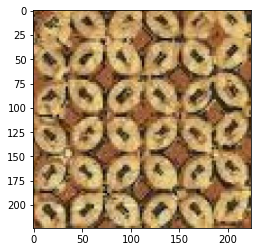

In [47]:
predict2('/content/train/Batik Kawung/1.jpg')

[11]
INI ADALAH BATIK: Batik Parang with a probability of 22.84%


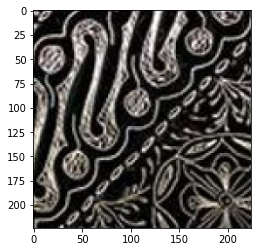

In [48]:
predict2('/content/train/Batik Parang/14.jpg')

[13]
INI ADALAH BATIK: Batik Sekar Jagad with a probability of 91.68%


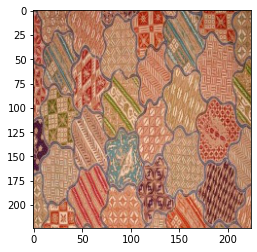

In [49]:
predict2('/content/train/Batik Sekar Jagad/12.jpg')

[14]
INI ADALAH BATIK: Batik Tambal with a probability of 97.57%


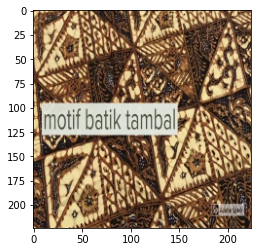

In [50]:
predict2('/content/train/Batik Tambal/12.jpg')

[6]
INI ADALAH BATIK: Batik Insang with a probability of 99.95%


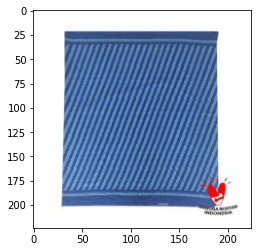

In [51]:
predict2('/content/train/Batik Insang/12.jpg')